<a href="https://colab.research.google.com/github/MaLuisa7/DeepLearning/blob/master/20230719_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import roc_auc_score


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...


Tensorflow Version 2.12.0


[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from keras import layers
from keras.models import Model,Sequential
from keras.layers import Input,  Embedding, Bidirectional, LSTM, Dense, Dropout, Concatenate, Multiply, Activation, Lambda,SpatialDropout1D
np.set_printoptions(threshold=np.inf)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path  = '/content/drive/MyDrive/sentiment140/Sentiment140.csv'
colnames = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(path, encoding='latin-1', names = colnames)
df.target = df.target.replace({4: 1})
df.drop(columns = ['id', 'date', 'flag', 'user'],inplace=True)
print(df.shape)
df.head()

(1600000, 2)


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data=df[['text','target']]

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
# data_pos = data_pos.iloc[:int(200000)]
# data_neg = data_neg.iloc[:int(200000)]
data = pd.concat([data_pos, data_neg])

In [ ]:
data['text']=data['text'].str.lower() #ponemos todo en lowecase

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
english_punctuations = string.punctuation #quitamos signos de puntuacion
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads much...
799999    resit exams summer wishes worked harder first ...
Name: text, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x)) #quitamos letras repetidas
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                 rest peace farah sad
799998    ericurbane sounds like rival flaging ads much ...
799999    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
def cleaning_email(data): #quitamos mails
    return re.sub('@[^\s]+', ' ', data)
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                 rest peace farah sad
799998    ericurbane sounds like rival flaging ads much ...
799999    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data): #quitamos urls
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                 rest peace farah sad
799998    ericurbane sounds like rival flaging ads much ...
799999    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
def cleaning_hashtags(data): #quitamos hashtags
    return re.sub(r'#\w*',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_hashtags(x))
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                 rest peace farah sad
799998    ericurbane sounds like rival flaging ads much ...
799999    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
def cleaning_iconos(data): #quitamos iconos
    return re.sub(r'@\w*',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_iconos(x))
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                 rest peace farah sad
799998    ericurbane sounds like rival flaging ads much ...
799999    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data): #quitamos numeros
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                 rest peace farah sad
799998    ericurbane sounds like rival flaging ads much ...
799999    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
def cleaning_non_alphanumeric(data):#quitamos todo aquello que no sea alfanumerico
  return re.sub(r'[^\w\s]', '', data )
data['text'] = data['text'].apply(lambda x: cleaning_non_alphanumeric(x))
data['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                 rest peace farah sad
799998    ericurbane sounds like rival flaging ads much ...
799999    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
tokenizer = RegexpTokenizer(r'\w+') #tokenizamos
data['text'] = data['text'].apply(tokenizer.tokenize)

In [ ]:
# st = nltk.PorterStemmer() #stemming
# def stemming_on_text(data):
#     text = [st.stem(word) for word in data]
#     return data

# data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [ ]:
data['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meting, one, besties, tonight, cant, wait...
800002    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800003    [sick, realy, cheap, hurts, much, eat, real, f...
800004                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [ ]:

lm = nltk.WordNetLemmatizer() #lematizamos
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [ ]:
data.head()

,text,target
800000,"[love, healthuandpets, u, guys, r, best]",1
800001,"[im, meting, one, besties, tonight, cant, wait...",1
800002,"[darealsunisakim, thanks, twiter, ad, sunisa, ...",1
800003,"[sick, realy, cheap, hurts, much, eat, real, f...",1
800004,"[lovesbroklyn, efect, everyone]",1


# Definicion de variable y parametros para el modelo

In [ ]:
X=data.text
y=data.target

In [ ]:
max_len = 10
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix.shape)



In [ ]:
n_sample = 200000
idx = np.random.choice(np.arange(len(sequences_matrix)), n_sample, replace=False)
sequences_matrix_sample = sequences_matrix[idx]
y_sample = y[idx]
print(sequences_matrix_sample.shape, y_sample.shape)

(200000, 10) (200000,)


In [ ]:
def plot_roc_curve(fpr,tpr,titulo):
  plt.figure()
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(titulo)
  plt.show()

# Modelado

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 50)            36706800  
                                                                 
 lstm_6 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_7 (LSTM)               (None, 10)                2440      
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537


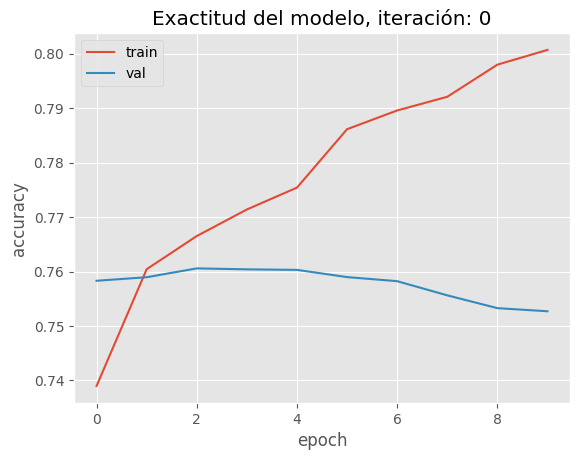

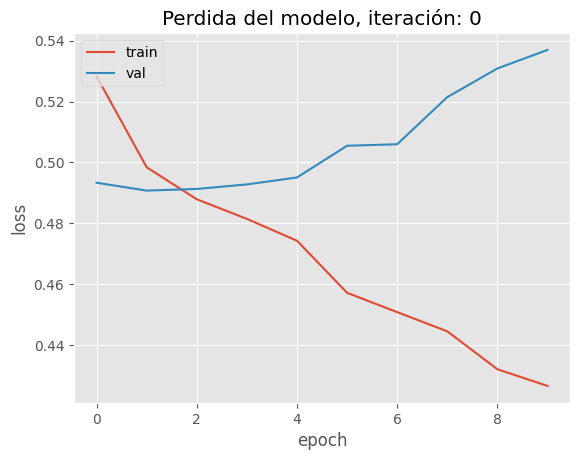

1250/1250 [==============================] - 4s 3ms/step


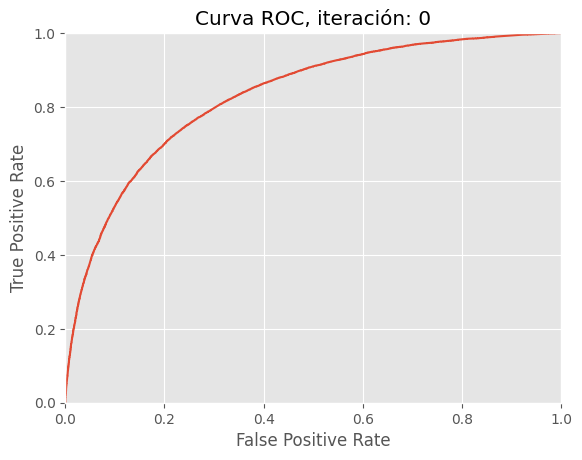

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 50)            36706800  
                                                                 
 lstm_8 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_9 (LSTM)               (None, 10)                2440      
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537


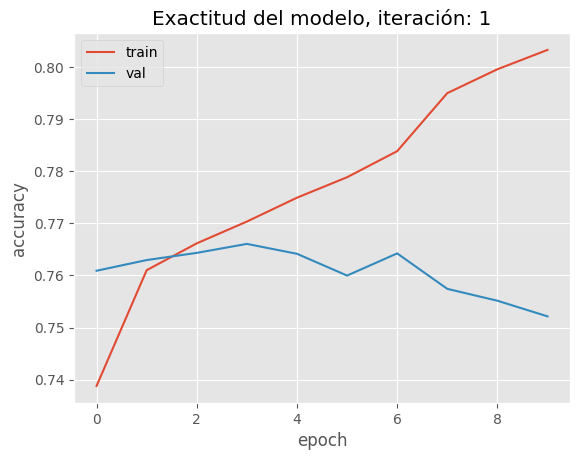

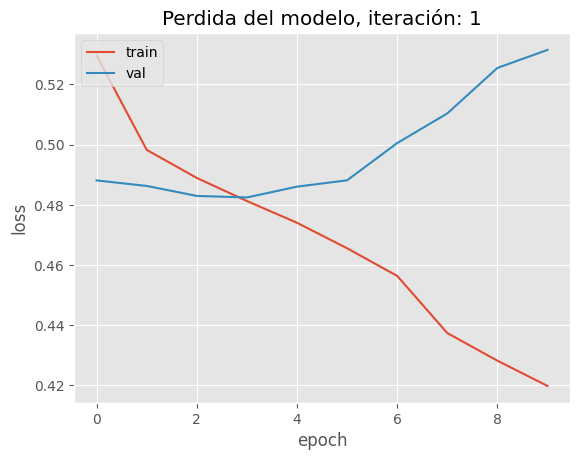

1250/1250 [==============================] - 4s 3ms/step


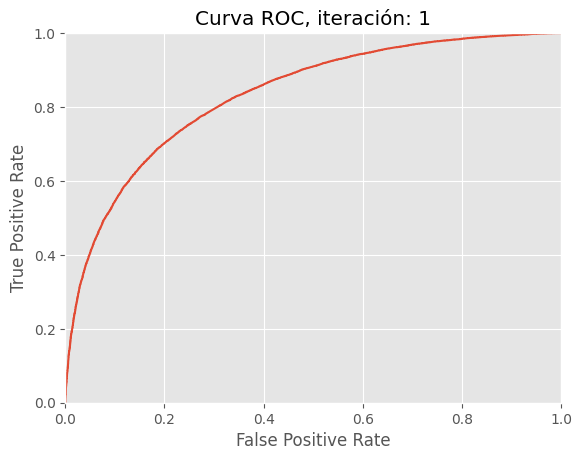

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 50)            36706800  
                                                                 
 lstm_10 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537


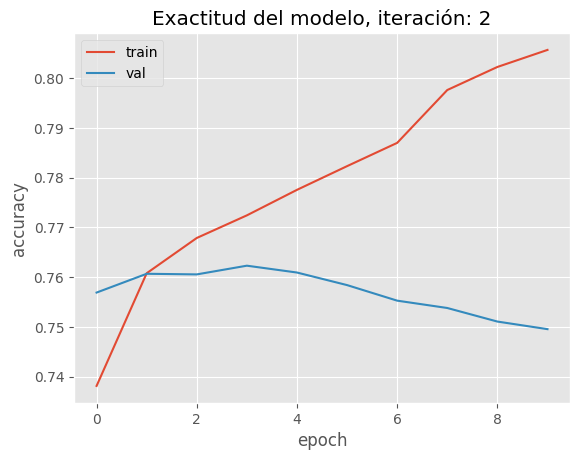

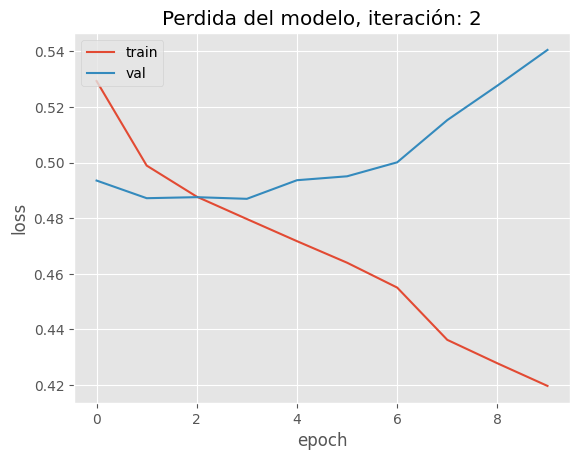

1250/1250 [==============================] - 5s 3ms/step


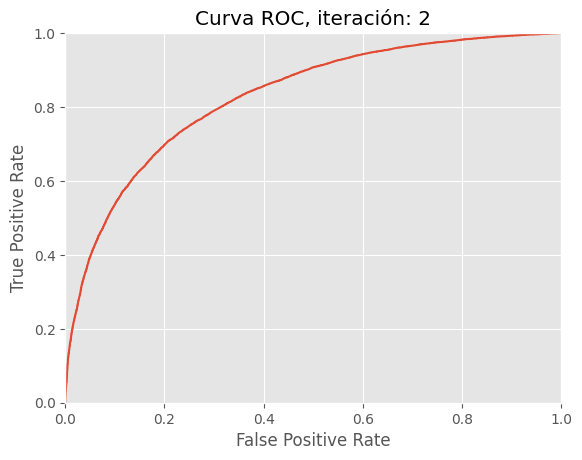

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 50)            36706800  
                                                                 
 lstm_12 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_13 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 88        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537


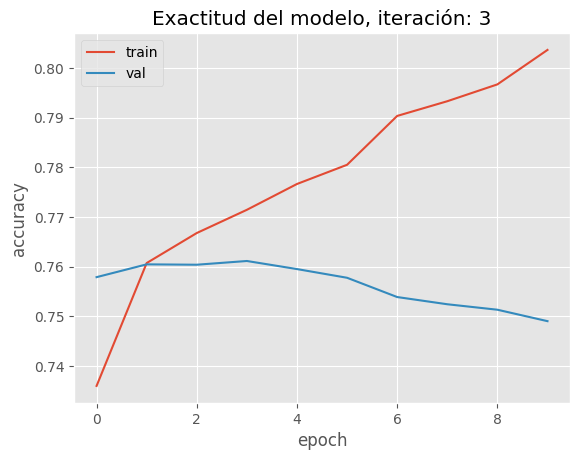

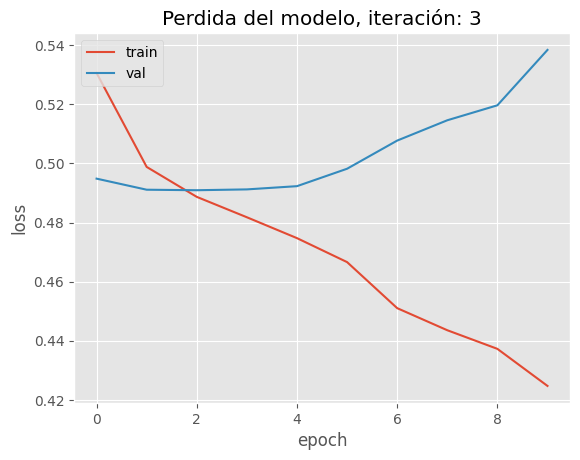

1250/1250 [==============================] - 5s 3ms/step


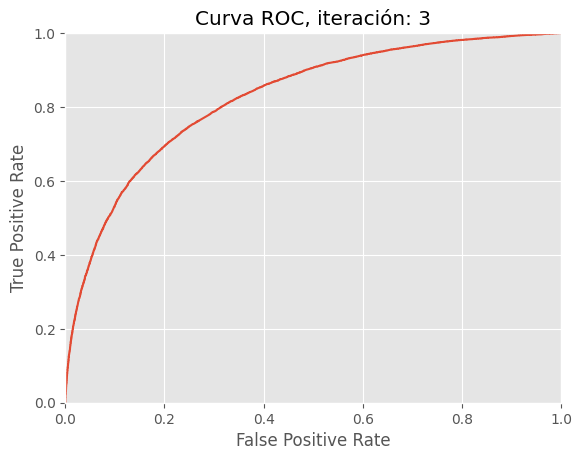

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 50)            36706800  
                                                                 
 lstm_14 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_15 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 88        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537


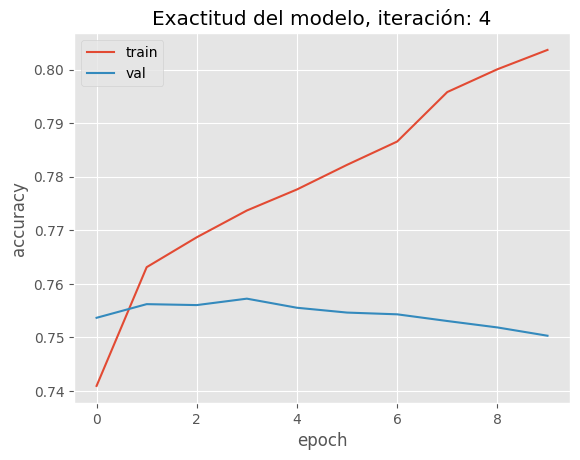

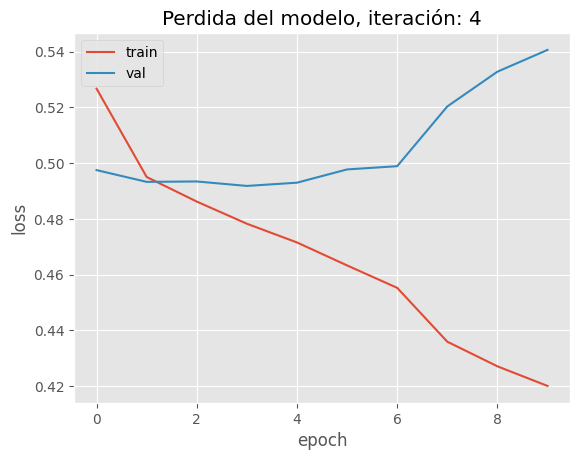

1250/1250 [==============================] - 5s 3ms/step


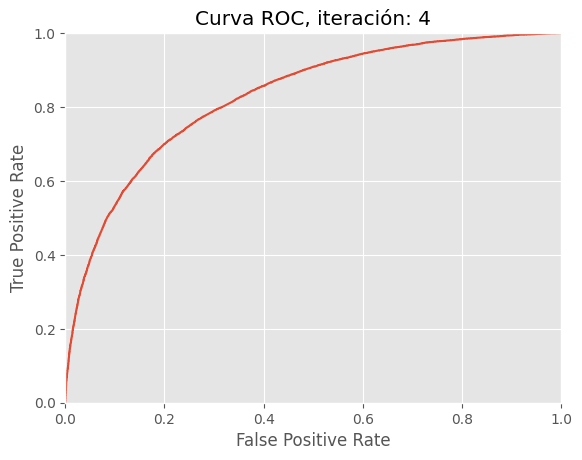

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 50)            36706800  
                                                                 
 lstm_16 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 88        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537


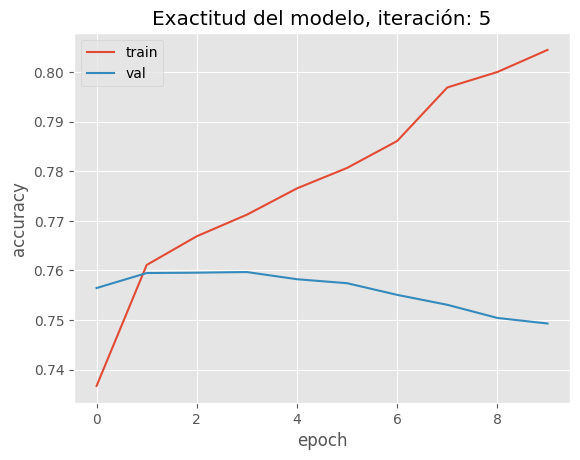

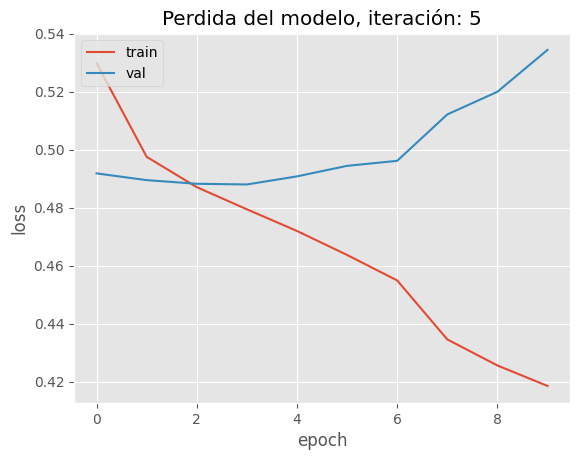

1250/1250 [==============================] - 5s 3ms/step


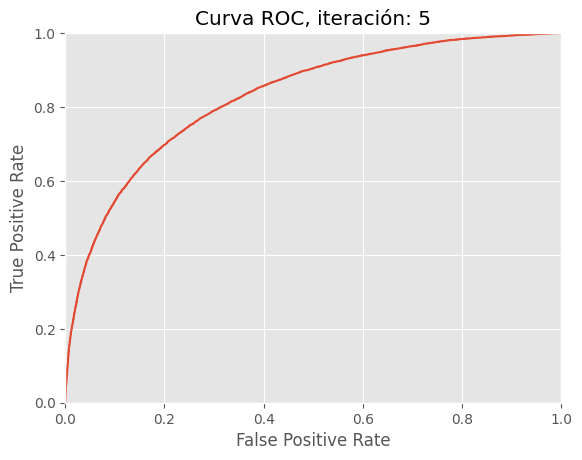

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 50)            36706800  
                                                                 
 lstm_18 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_19 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 88        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537


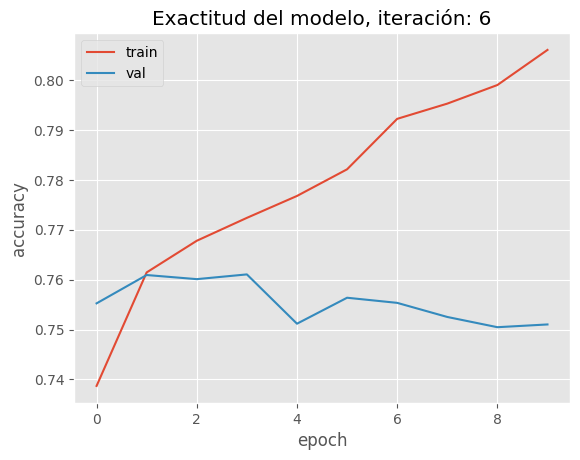

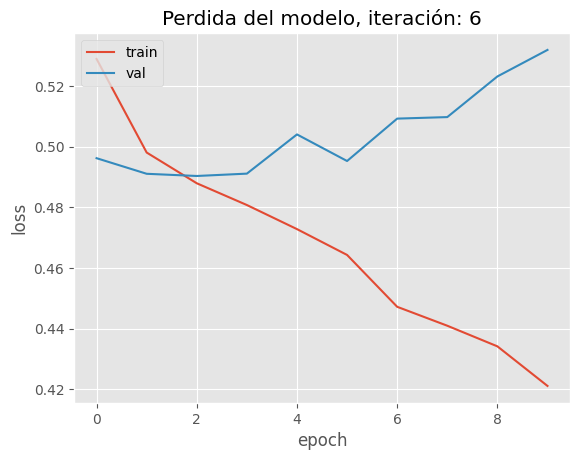

1250/1250 [==============================] - 5s 3ms/step


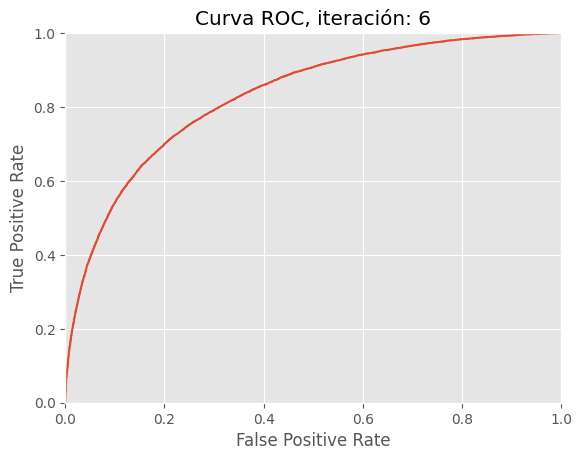

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 50)            36706800  
                                                                 
 lstm_20 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_21 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 88        
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537

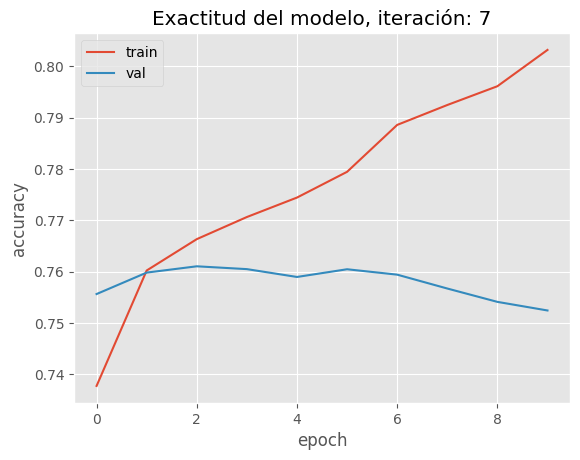

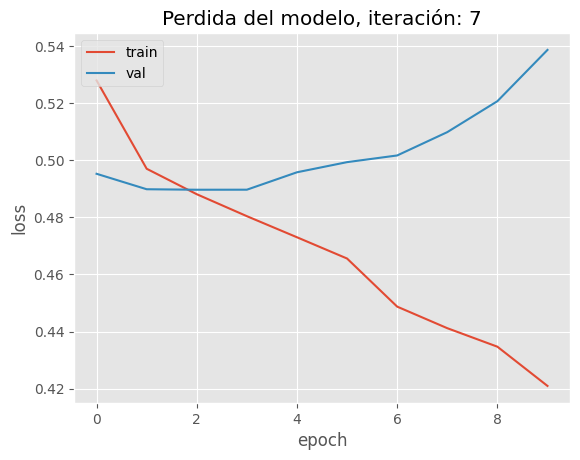

1250/1250 [==============================] - 4s 3ms/step


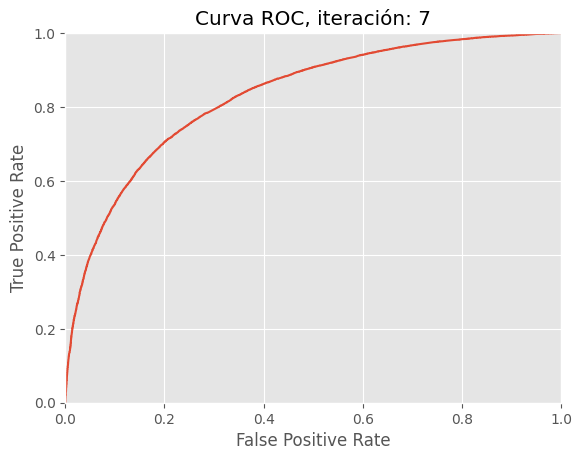

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 50)            36706800  
                                                                 
 lstm_22 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_23 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 88        
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537

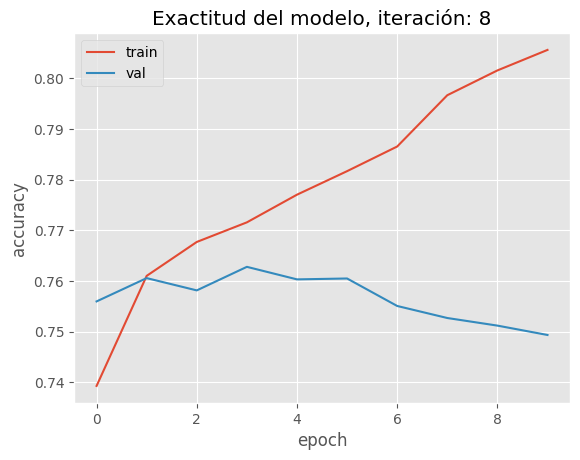

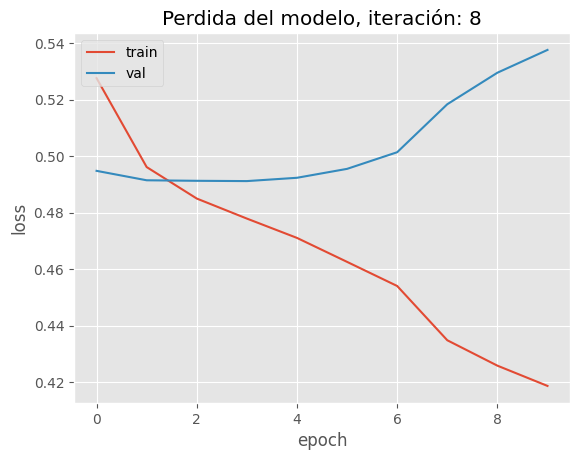

1250/1250 [==============================] - 5s 4ms/step


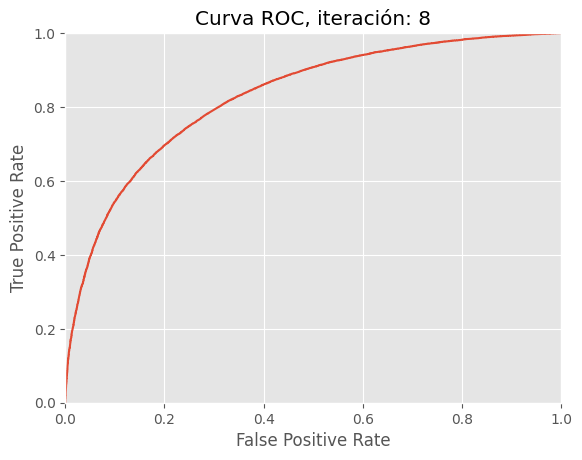

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 50)            36706800  
                                                                 
 lstm_24 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_25 (LSTM)              (None, 10)                2440      
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 88        
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,729,537
Trainable params: 36,729,537

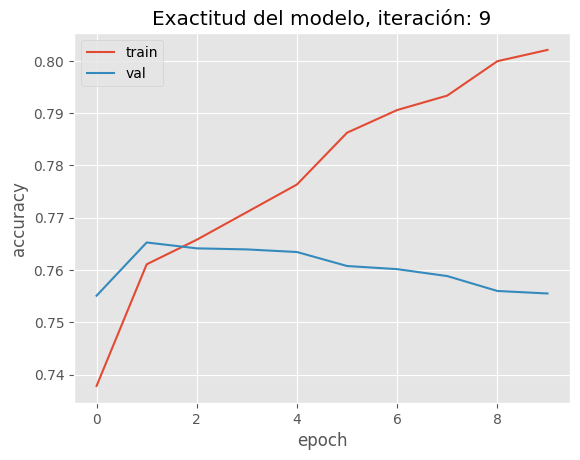

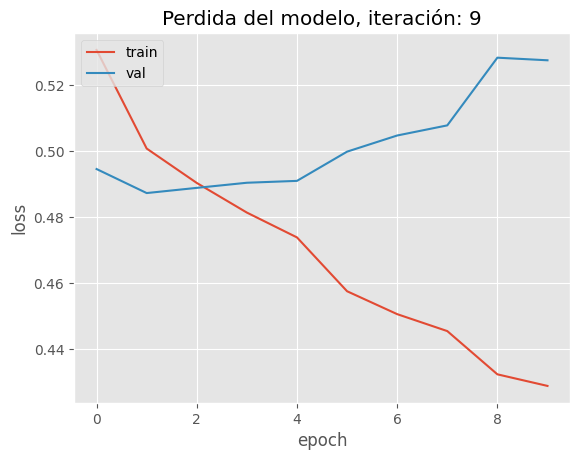

1250/1250 [==============================] - 5s 3ms/step


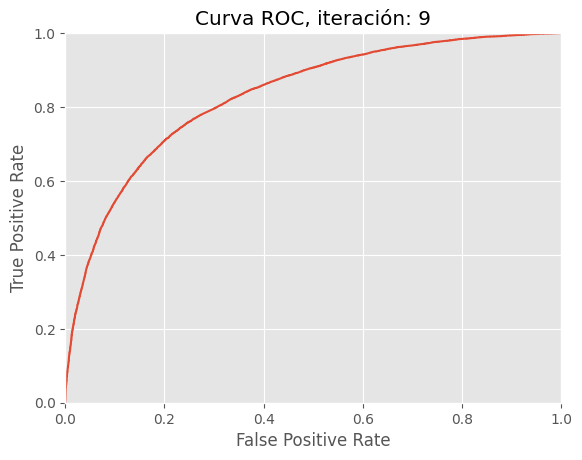

In [ ]:

vocab_size=len(tokenizer.word_index)+1
maxlen = max_len
embedding_dim=50

lst_resultados = []
lst_ypred =[]
lst_history = []
lst_roc =[]

for i in range(0,10):
  idx = np.random.choice(np.arange(len(sequences_matrix)), n_sample, replace=False)
  sequences_matrix_sample = sequences_matrix[idx]
  y_sample = y[idx]

  X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix_sample, y_sample, test_size=0.2, random_state=2)

  model=Sequential()
  model.add(layers.Embedding(input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=maxlen))
  model.add(layers.LSTM(units=50,return_sequences=True))
  model.add(layers.LSTM(units=10))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(8))
  model.add(layers.Dense(1, activation="sigmoid"))
  model.compile(optimizer="adam", loss="binary_crossentropy",
      metrics=['accuracy'])
  model.summary()

  lr_reduce = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=3, verbose=0, mode='auto',min_lr=0.0001)

  history = model.fit(X_train,Y_train, epochs=10, batch_size=64, verbose=True,
                      validation_data=(X_test, Y_test),
                      callbacks=[lr_reduce])

  historia = history
  plt.figure()
  plt.plot(historia.history['accuracy'])
  plt.plot(historia.history['val_accuracy'])
  plt.title('Exactitud del modelo, iteración: ' + str(i))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(historia.history['loss'])
  plt.plot(historia.history['val_loss'])
  plt.title('Perdida del modelo, iteración: ' + str(i))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


  accr1 = model.evaluate(X_test,Y_test)#loss y accuracy
  y_pred = model.predict(X_test)
  auc_score= roc_auc_score(Y_test,y_pred)
  fpr , tpr , thresholds = roc_curve ( Y_test , y_pred)

  lst_history.append([i, historia.history  ])
  lst_roc.append([i,  fpr , tpr , thresholds])
  lst_resultados.append([i, accr1, auc_score])
  lst_ypred.append([i,y_pred])

  plot_roc_curve(fpr,tpr,'Curva ROC, iteración: '+ str(i))



In [ ]:
lst_resultados_bkup= lst_resultados # ([i, accr1, auc_score])
lst_ypred_bkup =lst_ypred # ([i,y_pred])
lst_history_bkup=lst_history # [i, historia.history  ]
lst_roc_bkup=lst_roc # lst_roc.append([i,  fpr , tpr , thresholds])

In [ ]:
lst_resultados #i , loss, acc, auc_score

[[0, [0.5369610786437988, 0.7526999711990356], 0.8295023461809036],
 [1, [0.5314929485321045, 0.7521499991416931], 0.8324629167155824],
 [2, [0.5405367016792297, 0.7495499849319458], 0.8282141437132646],
 [3, [0.5384244322776794, 0.7490500211715698], 0.8266731108166829],
 [4, [0.540650486946106, 0.7502999901771545], 0.8288421618491957],
 [5, [0.534346342086792, 0.7493000030517578], 0.8297424947063435],
 [6, [0.5318732857704163, 0.7510250210762024], 0.8298528780244604],
 [7, [0.5386322736740112, 0.7524499893188477], 0.8305481194719249],
 [8, [0.5376037359237671, 0.7493500113487244], 0.829277630628666],
 [9, [0.5274415016174316, 0.7555249929428101], 0.8314604276817856]]

# Resultados

In [ ]:
path_history  = '/content/drive/MyDrive/sentiment140/resultados_20230719/df_lst_history_20230719.xlsx'
df_history = pd.read_excel(path_history )
df_history.head()

,Unnamed: 0,0,1
0,0,0,"{'loss': [0.5282739996910095, 0.49837759137153..."
1,1,1,"{'loss': [0.5296411514282227, 0.49827426671981..."
2,2,2,"{'loss': [0.5293453335762024, 0.49893921613693..."
3,3,3,"{'loss': [0.5306239724159241, 0.49883162975311..."
4,4,4,"{'loss': [0.5267587304115295, 0.49506175518035..."


In [ ]:
path_roc  = '/content/drive/MyDrive/sentiment140/resultados_20230719/df_lst_roc_20230719.xlsx'
df_roc = pd.read_excel(path_roc )
df_roc.head()

,Unnamed: 0,0,1,2,3
0,0,0,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00000000e+00 4.97339235e-05 9.94678470e-05 ...,[1.99999058e+00 9.99990582e-01 9.99988914e-01 ...
1,1,1,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00000000e+00 5.00325211e-05 6.00390254e-04 ...,[1.99998391e+00 9.99983907e-01 9.99976993e-01 ...
2,2,2,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00000000e+00 4.99525451e-05 4.49572906e-04 ...,[1.99998832e+00 9.99988317e-01 9.99980569e-01 ...
3,3,3,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00000000e+00 4.99975001e-05 2.49987501e-04 ...,[1.99998641e+00 9.99986410e-01 9.99982238e-01 ...
4,4,4,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0.00000000e+00 5.01856870e-05 1.50557061e-04 ...,[1.99998856e+00 9.99988556e-01 9.99983907e-01 ...


## Perdida , acc y auc por iteracion

In [ ]:
path_res = '/content/drive/MyDrive/sentiment140/resultados_20230719/df_resultados_20230719.xlsx'
df_res = pd.read_excel(path_res )
df_res = df_res.iloc[:,1:]
df_res.columns = ['idx', 'loss_acc','auc_score']
lst_lossacc =[]
for i in range(0,len(df_res)):
  los = float(df_res.loss_acc.iloc[i].split(',')[0].replace('[',""))
  acc = float(df_res.loss_acc.iloc[i].split(',')[1].replace(']',""))
  lst_lossacc.append([los,acc])

loss_acc = pd.DataFrame(data = lst_lossacc, columns=['Perdida', 'Exactitud'])
loss_acc['AUC'] = df_res.auc_score
loss_acc['Iteración'] = list(range(1,11))
loss_acc = loss_acc.loc[:,['Iteración','Perdida', 'Exactitud','AUC']]
loss_acc#.to_excel('loss_acc_AUC.xlsx')

,Iteración,Perdida,Exactitud,AUC
0,1,0.536961,0.752700,0.829502
1,2,0.531493,0.752150,0.832463
2,3,0.540537,0.749550,0.828214
3,4,0.538424,0.749050,0.826673
4,5,0.540650,0.750300,0.828842
5,6,0.534346,0.749300,0.829742
6,7,0.531873,0.751025,0.829853
7,8,0.538632,0.752450,0.830548
8,9,0.537604,0.749350,0.829278
9,10,0.527442,0.755525,0.831460


Text(0.5, 1.0, 'Métricas de evaluación por muestreo para el conjunto de test')

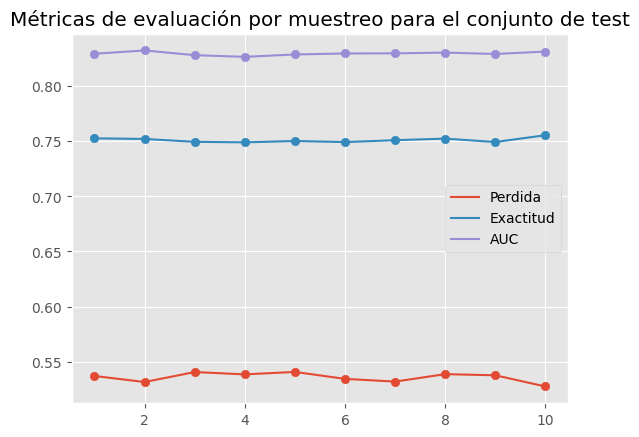

In [ ]:
plt.plot(loss_acc.iloc[:,0], loss_acc.iloc[:,1], label = loss_acc.iloc[:,1].name)
plt.plot(loss_acc.iloc[:,0], loss_acc.iloc[:,2], label = loss_acc.iloc[:,2].name)
plt.plot(loss_acc.iloc[:,0], loss_acc.iloc[:,3], label = loss_acc.iloc[:,3].name)
plt.scatter(loss_acc.iloc[:,0], loss_acc.iloc[:,1])
plt.scatter(loss_acc.iloc[:,0], loss_acc.iloc[:,2])
plt.scatter(loss_acc.iloc[:,0], loss_acc.iloc[:,3])
plt.legend()
plt.title('Métricas de evaluación por muestreo para el conjunto de test')

## History por iteracion

In [ ]:
df_history = df_history.iloc[:,-1]
df_history

0    {'loss': [0.5282739996910095, 0.49837759137153...
1    {'loss': [0.5296411514282227, 0.49827426671981...
2    {'loss': [0.5293453335762024, 0.49893921613693...
3    {'loss': [0.5306239724159241, 0.49883162975311...
4    {'loss': [0.5267587304115295, 0.49506175518035...
5    {'loss': [0.5297777056694031, 0.49748602509498...
6    {'loss': [0.5288955569267273, 0.49804297089576...
7    {'loss': [0.527942419052124, 0.497012346982955...
8    {'loss': [0.5276186466217041, 0.49615201354026...
9    {'loss': [0.5305792093276978, 0.50073873996734...
Name: 1, dtype: object

In [ ]:
import ast
lstlos = []
for i in range(0, 10):
  lst_loss= ast.literal_eval(df_history.iloc[i]).get('loss')
  lstlos.append(lst_loss)
df_loss = pd.DataFrame(lstlos).add_prefix('iter_')
df_loss

,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9
0,0.528274,0.498378,0.487878,0.481427,0.474238,0.457129,0.450782,0.444472,0.432000,0.426525
1,0.529641,0.498274,0.488934,0.481262,0.474031,0.465550,0.456366,0.437361,0.428179,0.419782
2,0.529345,0.498939,0.487752,0.479713,0.471752,0.464004,0.455059,0.436259,0.427826,0.419688
3,0.530624,0.498832,0.488696,0.481796,0.474734,0.466624,0.451041,0.443568,0.437266,0.424722
4,0.526759,0.495062,0.486242,0.478299,0.471578,0.463341,0.455299,0.435978,0.427148,0.420109
5,0.529778,0.497486,0.487033,0.479399,0.471927,0.463656,0.454871,0.434543,0.425560,0.418502
6,0.528896,0.498043,0.487910,0.480738,0.472796,0.464282,0.447184,0.440945,0.434147,0.421099
7,0.527942,0.497012,0.488091,0.480402,0.473016,0.465568,0.448721,0.441173,0.434691,0.420951
8,0.527619,0.496152,0.485011,0.477923,0.471086,0.462605,0.454069,0.434870,0.425883,0.418711
9,0.530579,0.500739,0.490325,0.481360,0.473850,0.457559,0.450629,0.445505,0.432418,0.428910


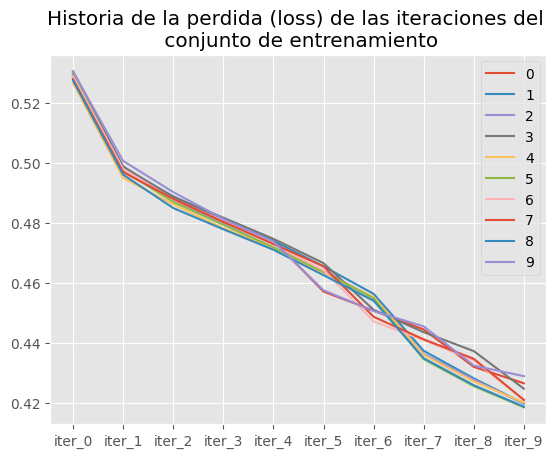

In [ ]:
x = df_loss.columns.to_list() #list(range(1,10))
plt.plot(x , df_loss.iloc[0,:], label =df_loss.iloc[0,:].name )
plt.plot(x , df_loss.iloc[1,:], label =df_loss.iloc[1,:].name )
plt.plot(x , df_loss.iloc[2,:], label =df_loss.iloc[2,:].name )
plt.plot(x , df_loss.iloc[3,:], label =df_loss.iloc[3,:].name )
plt.plot(x , df_loss.iloc[4,:], label =df_loss.iloc[4,:].name )
plt.plot(x , df_loss.iloc[5,:], label =df_loss.iloc[5,:].name )
plt.plot(x , df_loss.iloc[6,:], label =df_loss.iloc[6,:].name )
plt.plot(x , df_loss.iloc[7,:], label =df_loss.iloc[7,:].name )
plt.plot(x , df_loss.iloc[8,:], label =df_loss.iloc[8,:].name )
plt.plot(x , df_loss.iloc[9,:], label =df_loss.iloc[9,:].name )
plt.title('Historia de la perdida (loss) de las iteraciones del \n conjunto de entrenamiento')
plt.legend()

In [ ]:
lstac = []
for i in range(0, 10):
  lst_acc= ast.literal_eval(df_history.iloc[i]).get('accuracy')
  lstac.append(lst_acc)
df_acc = pd.DataFrame(lstac).add_prefix('iter_')
df_acc

,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9
0,0.738994,0.760425,0.766513,0.771388,0.775406,0.786131,0.789569,0.792081,0.797981,0.800687
1,0.738806,0.761006,0.766156,0.770331,0.774912,0.778838,0.783837,0.794969,0.799544,0.803256
2,0.738144,0.760781,0.767869,0.772412,0.777538,0.782300,0.786975,0.797594,0.802225,0.805650
3,0.736025,0.760737,0.766775,0.771444,0.776637,0.780500,0.790325,0.793281,0.796669,0.803600
4,0.740925,0.763106,0.768694,0.773694,0.777625,0.782225,0.786575,0.795819,0.800075,0.803688
5,0.736725,0.761100,0.766887,0.771231,0.776537,0.780656,0.786081,0.796869,0.799987,0.804438
6,0.738712,0.761450,0.767788,0.772375,0.776762,0.782100,0.792206,0.795256,0.798981,0.806013
7,0.737763,0.760231,0.766338,0.770644,0.774431,0.779444,0.788575,0.792450,0.796106,0.803175
8,0.739294,0.761019,0.767712,0.771581,0.777044,0.781687,0.786550,0.796675,0.801569,0.805619
9,0.737850,0.761100,0.765800,0.771075,0.776362,0.786263,0.790594,0.793356,0.799931,0.802087


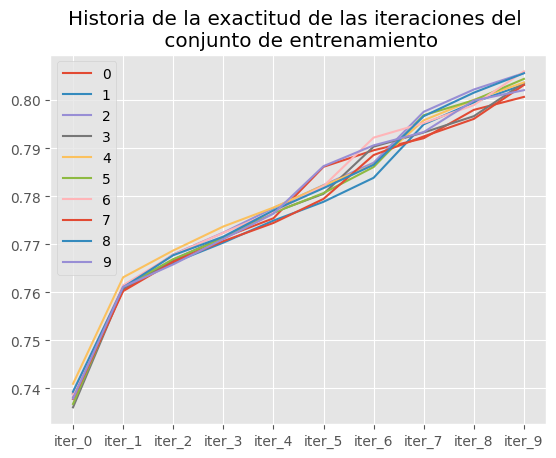

In [ ]:
df_example = df_acc
plt.plot(x , df_example.iloc[0,:], label =df_example.iloc[0,:].name )
plt.plot(x , df_example.iloc[1,:], label =df_example.iloc[1,:].name )
plt.plot(x , df_example.iloc[2,:], label =df_example.iloc[2,:].name )
plt.plot(x , df_example.iloc[3,:], label =df_example.iloc[3,:].name )
plt.plot(x , df_example.iloc[4,:], label =df_example.iloc[4,:].name )
plt.plot(x , df_example.iloc[5,:], label =df_example.iloc[5,:].name )
plt.plot(x , df_example.iloc[6,:], label =df_example.iloc[6,:].name )
plt.plot(x , df_example.iloc[7,:], label =df_example.iloc[7,:].name )
plt.plot(x , df_example.iloc[8,:], label =df_example.iloc[8,:].name )
plt.plot(x , df_example.iloc[9,:], label =df_example.iloc[9,:].name )
plt.title('Historia de la exactitud de las iteraciones del \n conjunto de entrenamiento')
plt.legend()

In [ ]:
lstval_loss = []
for i in range(0, 10):
  lst_val_loss= ast.literal_eval(df_history.iloc[i]).get('val_loss')
  lstval_loss.append(lst_val_loss)
df_val_loss = pd.DataFrame(lstval_loss).add_prefix('iter_')
df_val_loss

,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9
0,0.493311,0.490719,0.491268,0.492757,0.495036,0.505465,0.505961,0.521439,0.530864,0.536961
1,0.488103,0.486273,0.482954,0.482438,0.486037,0.488138,0.500527,0.510375,0.525501,0.531493
2,0.493555,0.487206,0.487578,0.486981,0.493676,0.495083,0.500114,0.515299,0.527697,0.540536
3,0.494866,0.491119,0.490946,0.491226,0.492319,0.498216,0.507743,0.514617,0.519684,0.538425
4,0.497528,0.493313,0.493461,0.491855,0.493023,0.497778,0.498938,0.520369,0.532835,0.540650
5,0.491778,0.489450,0.488199,0.487960,0.490744,0.494376,0.496109,0.512101,0.519916,0.534347
6,0.496179,0.491037,0.490313,0.491088,0.504014,0.495248,0.509226,0.509730,0.523127,0.531873
7,0.495250,0.489836,0.489663,0.489678,0.495779,0.499328,0.501668,0.509838,0.520670,0.538632
8,0.494813,0.491476,0.491292,0.491190,0.492360,0.495516,0.501407,0.518385,0.529535,0.537605
9,0.494538,0.487267,0.488838,0.490388,0.490955,0.499800,0.504684,0.507747,0.528231,0.527442


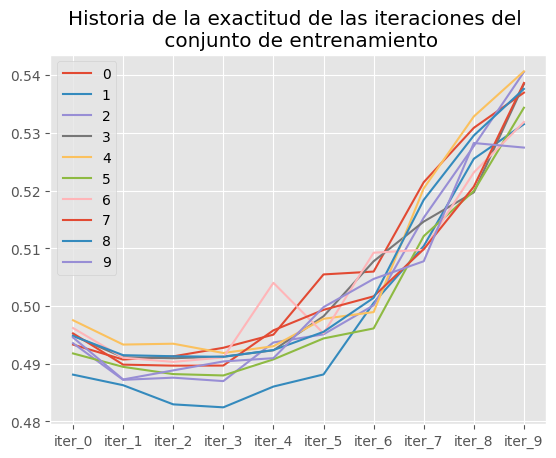

In [ ]:
df_example = df_val_loss
plt.plot(x , df_example.iloc[0,:], label =df_example.iloc[0,:].name )
plt.plot(x , df_example.iloc[1,:], label =df_example.iloc[1,:].name )
plt.plot(x , df_example.iloc[2,:], label =df_example.iloc[2,:].name )
plt.plot(x , df_example.iloc[3,:], label =df_example.iloc[3,:].name )
plt.plot(x , df_example.iloc[4,:], label =df_example.iloc[4,:].name )
plt.plot(x , df_example.iloc[5,:], label =df_example.iloc[5,:].name )
plt.plot(x , df_example.iloc[6,:], label =df_example.iloc[6,:].name )
plt.plot(x , df_example.iloc[7,:], label =df_example.iloc[7,:].name )
plt.plot(x , df_example.iloc[8,:], label =df_example.iloc[8,:].name )
plt.plot(x , df_example.iloc[9,:], label =df_example.iloc[9,:].name )
plt.title('Historia de la perdida (loss) de las iteraciones del \n conjunto de prueba')
plt.legend()

In [ ]:
lstval_acc = []
for i in range(0, 10):
  lst_val_acc= ast.literal_eval(df_history.iloc[i]).get('val_accuracy')
  lstval_acc.append(lst_val_acc)
df_val_acc= pd.DataFrame(lstval_acc).add_prefix('iter_')
df_val_acc


,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9
0,0.758300,0.758950,0.760575,0.760400,0.760300,0.758975,0.758225,0.755625,0.753275,0.752700
1,0.760900,0.762950,0.764325,0.766050,0.764150,0.759975,0.764225,0.757425,0.755150,0.752150
2,0.756900,0.760675,0.760550,0.762300,0.760925,0.758400,0.755275,0.753800,0.751075,0.749550
3,0.757900,0.760475,0.760400,0.761150,0.759525,0.757775,0.753900,0.752450,0.751350,0.749050
4,0.753650,0.756200,0.756025,0.757225,0.755525,0.754625,0.754300,0.753050,0.751850,0.750300
5,0.756450,0.759475,0.759550,0.759675,0.758225,0.757425,0.755075,0.753075,0.750425,0.749300
6,0.755250,0.760925,0.760100,0.761050,0.751175,0.756375,0.755350,0.752525,0.750475,0.751025
7,0.755650,0.759825,0.761050,0.760500,0.758975,0.760475,0.759425,0.756725,0.754125,0.752450
8,0.755975,0.760575,0.758150,0.762800,0.760325,0.760500,0.755075,0.752700,0.751200,0.749350
9,0.755100,0.765275,0.764150,0.763950,0.763450,0.760775,0.760175,0.758850,0.756000,0.755525


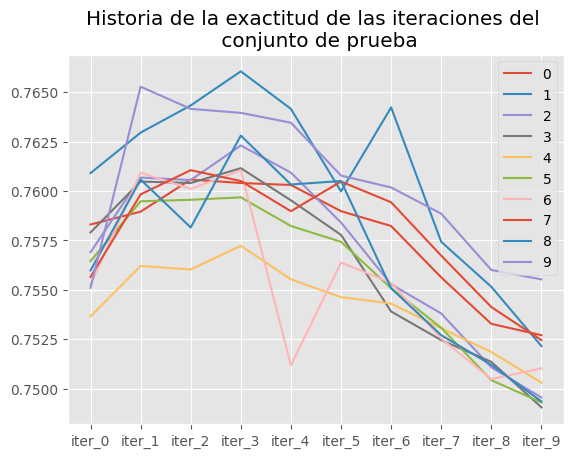

In [ ]:
df_example = df_val_acc
plt.plot(x , df_example.iloc[0,:], label =df_example.iloc[0,:].name )
plt.plot(x , df_example.iloc[1,:], label =df_example.iloc[1,:].name )
plt.plot(x , df_example.iloc[2,:], label =df_example.iloc[2,:].name )
plt.plot(x , df_example.iloc[3,:], label =df_example.iloc[3,:].name )
plt.plot(x , df_example.iloc[4,:], label =df_example.iloc[4,:].name )
plt.plot(x , df_example.iloc[5,:], label =df_example.iloc[5,:].name )
plt.plot(x , df_example.iloc[6,:], label =df_example.iloc[6,:].name )
plt.plot(x , df_example.iloc[7,:], label =df_example.iloc[7,:].name )
plt.plot(x , df_example.iloc[8,:], label =df_example.iloc[8,:].name )
plt.plot(x , df_example.iloc[9,:], label =df_example.iloc[9,:].name )
plt.title('Historia de la exactitud de las iteraciones del \n conjunto de prueba')
plt.legend()